### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [10]:
data.shape # Show the amount of rows and columns

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [12]:
missing_counts = data.isnull().sum().sort_values() # Find columns that have missing data and by how much

print(missing_counts)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


In [13]:
data.duplicated().sum() # Total duplicate rows

74

In [14]:
identical_rows = data[data.duplicated(keep=False)]  # Get all duplicate rows
print(identical_rows.groupby(identical_rows.columns.tolist()).size())  # Count identical duplicates

# Output is an empty series, meaning there are no fully identical duplicates across all columns

Series([], dtype: int64)


In [15]:
print(data['car'].value_counts(dropna=False))  # Includes NaN counts

NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64


In [16]:
print(data['CoffeeHouse'].value_counts(dropna=False))  # Includes NaN counts

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64


In [17]:
print(data['Restaurant20To50'].value_counts(dropna=False))  # Includes NaN counts

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: int64


In [18]:
print(data['CarryAway'].value_counts(dropna=False))  # Includes NaN counts

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: CarryAway, dtype: int64


In [19]:
print(data['RestaurantLessThan20'].value_counts(dropna=False))  # Includes NaN counts

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: RestaurantLessThan20, dtype: int64


In [20]:
print(data['Bar'].value_counts(dropna=False))  # Includes NaN counts

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: Bar, dtype: int64


In [21]:
missing_percentage = data['car'].isnull().sum() / len(data) * 100
print(f"Missing data in 'car': {missing_percentage:.2f}%")

missing_percentage = data['CoffeeHouse'].isnull().sum() / len(data) * 100
print(f"Missing data in 'CoffeeHouse': {missing_percentage:.2f}%")

missing_percentage = data['Restaurant20To50'].isnull().sum() / len(data) * 100
print(f"Missing data in 'Restaurant20To50': {missing_percentage:.2f}%")

missing_percentage = data['CarryAway'].isnull().sum() / len(data) * 100
print(f"Missing data in 'CarryAway': {missing_percentage:.2f}%")

missing_percentage = data['RestaurantLessThan20'].isnull().sum() / len(data) * 100
print(f"Missing data in 'RestaurantLessThan20': {missing_percentage:.2f}%")

missing_percentage = data['Bar'].isnull().sum() / len(data) * 100
print(f"Missing data in 'Bar': {missing_percentage:.2f}%")

Missing data in 'car': 99.15%
Missing data in 'CoffeeHouse': 1.71%
Missing data in 'Restaurant20To50': 1.49%
Missing data in 'CarryAway': 1.19%
Missing data in 'RestaurantLessThan20': 1.02%
Missing data in 'Bar': 0.84%


3. Decide what to do about your missing data -- drop, replace, other...

In [23]:
data.drop(columns=['car'], inplace=True) # Drop the car column as the majority (99%) of values are missing

# Fill categorical columns with their mode (most frequent value)
for col in ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [24]:
data.shape # Make sure the car column is dropped. The second number should be 25 instead of 26

(12684, 25)

In [25]:
print(data.isnull().sum())  # Ensure no missing values remain

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [27]:
# Count occurrences of each response (0 = not accepted, 1 = accepted)
coupon_acceptance_counts = data['Y'].value_counts(normalize=True)

# Display the proportion of accepted coupons
accepted_proportion = coupon_acceptance_counts[1]  # Proportion of 'Y = 1'
print(f"Proportion of accepted coupons: {accepted_proportion:.2%}")

Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

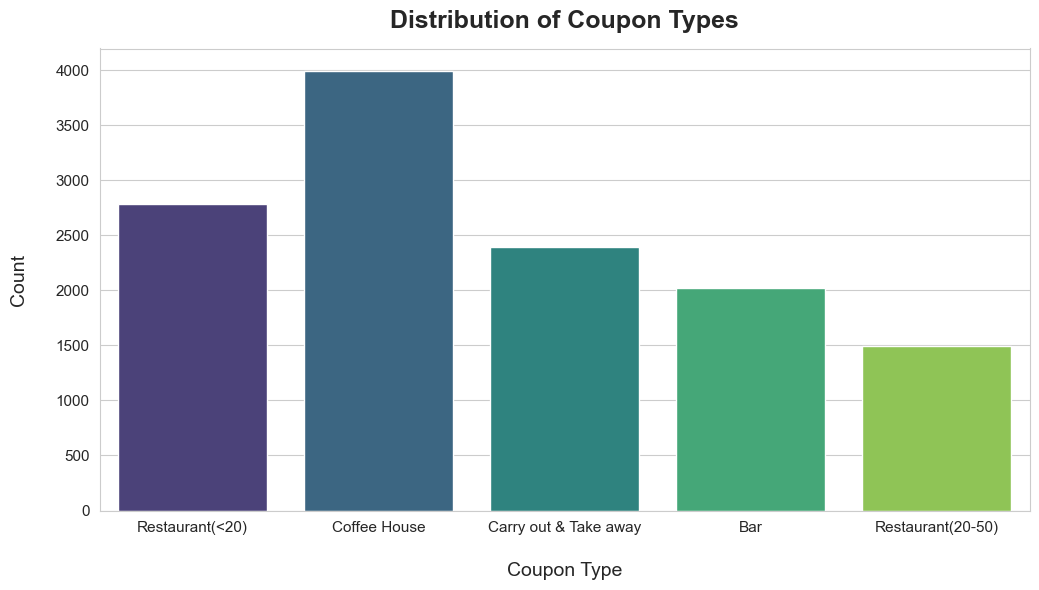

In [29]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the bar plot
sns.countplot(x=data['coupon'], palette="viridis")

# Customize plot
plt.xlabel("Coupon Type", fontsize=14, labelpad=20)  # Increase font size and add space
plt.ylabel("Count", fontsize=14, labelpad=20)  # Increase font size and add space
plt.title("Distribution of Coupon Types", fontsize=18, fontweight="bold", pad=15)  # Bigger & bolder title with more space
plt.xticks(fontsize=11)  # Increase x-axis labels font size
plt.yticks(fontsize=11)  # Increase y-axis label font size

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

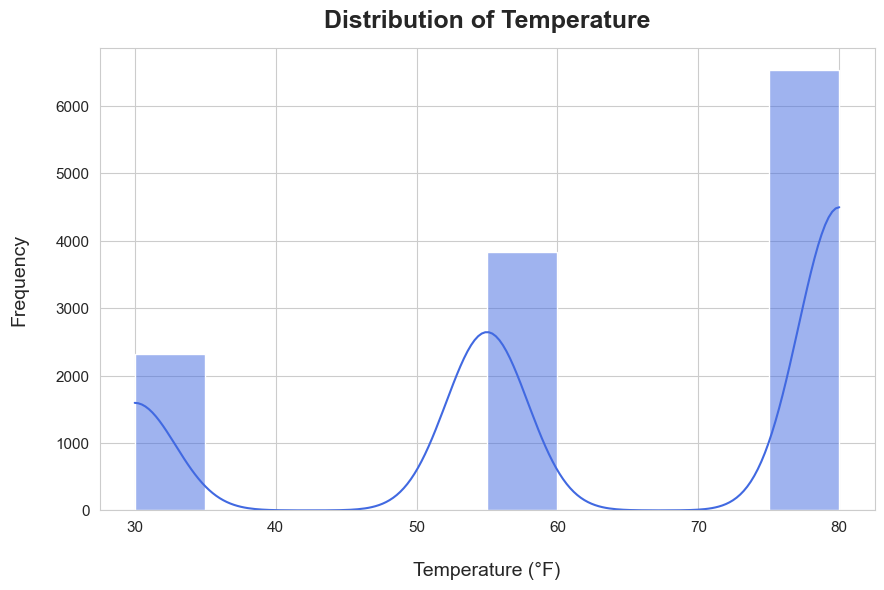

In [31]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the histogram
sns.histplot(data['temperature'], bins=10, kde=True, color="royalblue")

# Customize labels and title
plt.xlabel("Temperature (°F)", fontsize=14, labelpad=20)
plt.ylabel("Frequency", fontsize=14, labelpad=20)
plt.title("Distribution of Temperature", fontsize=18, fontweight="bold", pad=15)
plt.xticks(fontsize=11)  # Increase x-axis labels font size
plt.yticks(fontsize=11)  # Increase y-axis label font size

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [33]:
# Create a new DataFrame that only contains bar-related coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [35]:
# Count accepted and rejected coupons
bar_acceptance_counts = bar_coupons_df['Y'].value_counts(normalize=True)

# Get the proportion of accepted coupons (Y = 1)
accepted_proportion = bar_acceptance_counts[1]

# Print the result
print(f"Proportion of accepted bar coupons: {accepted_proportion:.2%}")

Proportion of accepted bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [37]:
# Create two groups
low_bar_visitors = bar_coupons_df[bar_coupons_df['Bar'].isin(["less1", "1~3"])] # Excluding "never" as this is to compare those who went to a bar
high_bar_visitors = bar_coupons_df[bar_coupons_df['Bar'].isin(["4~8", "gt8"])]

# Calculate the acceptance rate for both groups
low_acceptance_rate = low_bar_visitors['Y'].mean()
high_acceptance_rate = high_bar_visitors['Y'].mean()

# Print results
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {low_acceptance_rate:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {high_acceptance_rate:.2%}")



Acceptance rate for those who went to a bar 3 or fewer times a month: 52.74%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


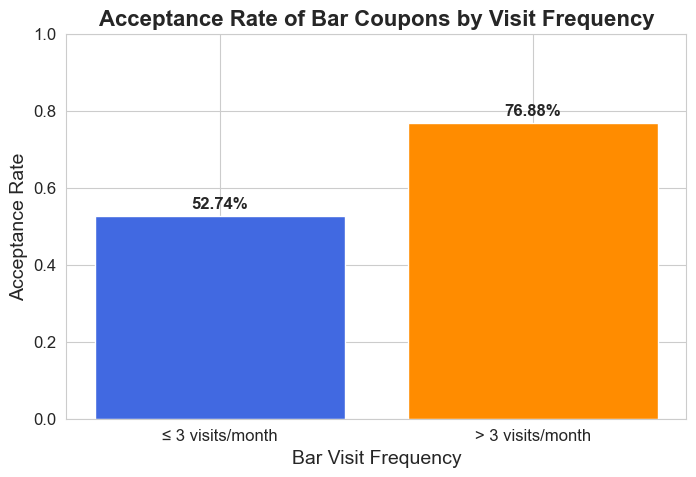

In [38]:
# Data for plotting
categories = ["≤ 3 visits/month", "> 3 visits/month"]
rates = [low_acceptance_rate, high_acceptance_rate]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, rates, color=['royalblue', 'darkorange'])

# Customize labels and title
plt.ylabel("Acceptance Rate", fontsize=14)
plt.xlabel("Bar Visit Frequency", fontsize=14)
plt.title("Acceptance Rate of Bar Coupons by Visit Frequency", fontsize=16, fontweight="bold")
plt.ylim(0, 1)  # Scale y-axis from 0% to 100%
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels on bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12, fontweight="bold")

plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [45]:
# Ensure we are working with a copy to avoid SettingWithCopyWarning
bar_coupons_df = bar_coupons_df.copy()

# Convert age to numeric
bar_coupons_df['age'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')

# Group 1: Frequent bar-goers (more than once a month) AND over 25
frequent_bar_goers_over_25 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['age'] > 25)
]

# Group 2: All other drivers
all_other_drivers = bar_coupons_df[~(
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['age'] > 25)
)]

# Compute acceptance rates
frequent_bar_goers_over_25_acceptance = frequent_bar_goers_over_25['Y'].mean()
all_other_drivers_acceptance = all_other_drivers['Y'].mean()

# Print results
print(f"Acceptance rate (Frequent bar-goers > 25): {frequent_bar_goers_over_25_acceptance:.2%}")
print(f"Acceptance rate (All others): {all_other_drivers_acceptance:.2%}")


Acceptance rate (Frequent bar-goers > 25): 69.97%
Acceptance rate (All others): 34.86%


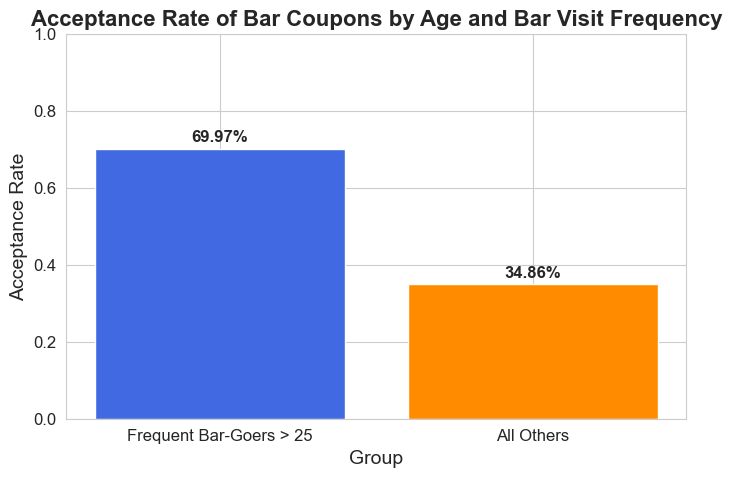

In [47]:
# Data for plotting
categories = ["Frequent Bar-Goers > 25", "All Others"]
rates = [frequent_bar_goers_over_25_acceptance, all_other_drivers_acceptance]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, rates, color=['royalblue', 'darkorange'])

# Customize labels and title
plt.ylabel("Acceptance Rate", fontsize=14)
plt.xlabel("Group", fontsize=14)
plt.title("Acceptance Rate of Bar Coupons by Age and Bar Visit Frequency", fontsize=16, fontweight="bold")
plt.ylim(0, 1)  # Scale y-axis from 0% to 100%
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels on bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12, fontweight="bold")

plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [54]:
# Group 1: Drivers who go to bars more than once a month, had a passenger (not a kid), and were not in farming, fishing, or forestry
qualified_bar_goers = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['passanger'].isin(["Friend(s)", "Partner"])) &  # Excludes "Alone" and "Kid(s)"
    (bar_coupons_df['occupation'] != "Farming Fishing & Forestry")
]

# Group 2: All other drivers (anyone who does NOT meet all three conditions)
other_drivers = bar_coupons_df[~(
    (bar_coupons_df['Bar'].isin(["1~3", "4~8", "gt8"])) & 
    (bar_coupons_df['passanger'].isin(["Friend(s)", "Partner"])) & 
    (bar_coupons_df['occupation'] != "Farming Fishing & Forestry")
)]

# Calculate acceptance rates
qualified_bar_goers_acceptance = qualified_bar_goers['Y'].mean()
other_drivers_acceptance = other_drivers['Y'].mean()

# Print results
print(f"Acceptance rate (Qualified Bar-Goers): {qualified_bar_goers_acceptance:.2%}")
print(f"Acceptance rate (All Other Drivers): {other_drivers_acceptance:.2%}")


Acceptance rate (Qualified Bar-Goers): 71.79%
Acceptance rate (All Other Drivers): 37.71%


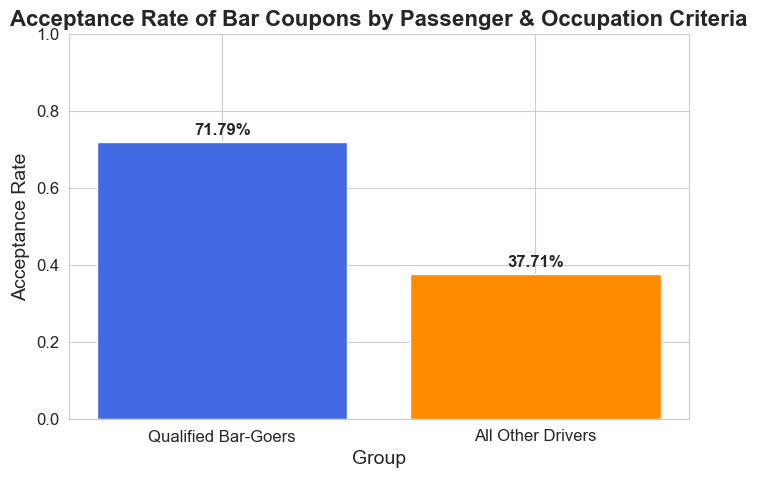

In [56]:
# Data for plotting
categories = ["Qualified Bar-Goers", "All Other Drivers"]
rates = [qualified_bar_goers_acceptance, other_drivers_acceptance]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, rates, color=['royalblue', 'darkorange'])

# Customize labels and title
plt.ylabel("Acceptance Rate", fontsize=14)
plt.xlabel("Group", fontsize=14)
plt.title("Acceptance Rate of Bar Coupons by Passenger & Occupation Criteria", fontsize=16, fontweight="bold")
plt.ylim(0, 1)  # Scale y-axis from 0% to 100%
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels on bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.02, f"{rate:.2%}", ha='center', fontsize=12, fontweight="bold")

plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  